# Case Study 3: PCA with MNIST
## ECE204 Data Science & Engineering

### Lecture Notes

### In-Class Activity
#### Please first read the questions in the in-class activity, where the questions are there in detail. This is just a starter notebook.

#### Import Statements

In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


---
**Problem 1.** **How do the reconstructed images `X_est` look with two dimensions, i.e. with `n_components=2`**?

`NOTE:` Go up to the section in the case study notebook from lecture where we visualized reconstructed images, and run the relevant code with `n_components=2`.

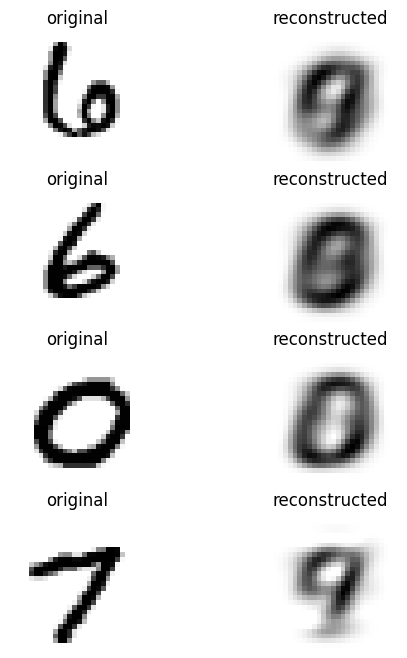

In [26]:
data = np.load("mnist.npz")
X = data["X"]
labels = data["y"]
X.shape

embedding = PCA(n_components=2)
X_low = embedding.fit_transform(X)
X_inv = embedding.inverse_transform(X_low)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(6,8))

for left, right in axs:
    
    # pick an image at random
    k = np.random.randint(len(labels))
    
    # reshape images
    img = X[k].reshape(28, 28)
    img_est = X_inv[k].reshape(28, 28).clip(min=0,max=255)
    
    left.imshow(img, cmap='gray_r')
    left.set_title('original')
    left.axis('off')
    right.imshow(img_est, cmap='gray_r')
    right.set_title('reconstructed')
    right.axis('off')

---
**Problem 2.** **How much variance is explained by PCA with `n_components=2`?**

`NOTE:` Round your result to 3 places after the decimal

In [27]:
embedding.n_components_, round(embedding.explained_variance_ratio_.sum().item(), 2)

(2, 0.17)

---
**Problem 3.**
Code has been provided (below) that computes a 2-dimensional approximation to MNIST using PCA. Apply K-Means clustering to the transformed dataset, using 10 clusters. A visualization is then created that shows which cluster each point (MNIST digit) belongs to using K-Means.

**How are the KMeans clustering labels separated?** 

**How are the actual labels separated?**

In [28]:
data = np.load("mnist.npz")
X = data["X"]
actual_labels = data["y"]

X_low = PCA(n_components=2).fit_transform(X)
labels_hat = KMeans(n_clusters=10).fit_predict(X_low)

<Axes: xlabel='0', ylabel='1'>

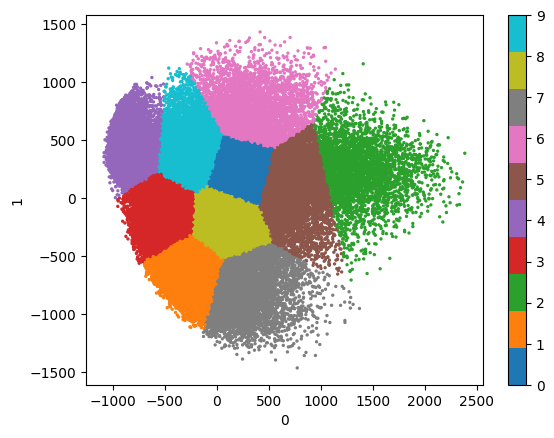

In [29]:
show = pd.DataFrame(X_low)
show.plot.scatter(x=0, y=1, style="o", c=labels_hat, cmap="tab10", s=2)

<Axes: xlabel='0', ylabel='1'>

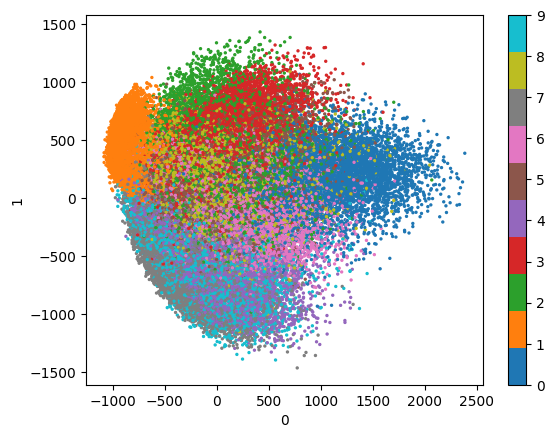

In [30]:
show.plot.scatter(x=0, y=1, style="o", c=actual_labels, cmap="tab10", s=2)